In [2335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re


In [2336]:
df=pd.read_csv("final_nvmp.csv")

In [2337]:
#preview the dataset

df.head()

,Station Code,Name of Monitoring Location,State Name,Temp_Min,Temp_Max,pH_Min,pH_Max,Conductivity_Min,Conductivity_Max,BOD_Min,DOB_Max,Nitrate?N + Nitrite_N Min,Nitrate?N + Nitrite_N Max,Fecal Coliform_Min,Fecal Coliform_Max,Total Coliform_Min,Total Coliform_Max,Total Dissolved Solids_Min,Total Dissolved Solids_Max,Fluoride_Min,Fluoride_Max,Arsenic_Min,Arsenic_Max,Drinkability
0,26,"BORE WELL AT KANURUPANCHAYAT, VIJAYAWADA",ANDHRA PRADESH,24,24,7.28,7.4,2300,2390,2.2,2.4,3.15,3.77,3,3,11,21,1356,1480,0.38,0.44,BDL,BDL,Not Drinkable
1,1513,"BORE WELL AT AUTONAGAR, VIJAYAWADA.( IN THE R/...",ANDHRA PRADESH,24,24,7.07,7.86,2140,2210,2.2,2.2,1.38,-3.42,3,4,13,20,1260,1328,0.32,0.36,BDL,BDL,Not Drinkable
2,1514,"BORE WELL AT AUTONAGAR, VIJAYAWADA.( IN THE R/...",ANDHRA PRADESH,25,25,-7.21,7.26,1996,2160,2,2.2,3.61,3.99,3,3,11,15,1178,1260,0.68,0.71,0.0019,0.0019,Not Drinkable
3,1516,"BOREWELL OF NAVLOKGARDENS, NELLORE TOWN",ANDHRA PRADESH,20,21,7.85,8.06,1270,1340,1.8,2,1.31,1.43,3,3,14,15,750,790,0.26,0.3,0.0027,0.0027,Not Drinkable
4,1517,"BOREWELL NEAR TUNGBHADRA RIVER, MAMIDALAPADU (...",ANDHRA PRADESH,21,24,7.2,7.5,2068,6410,1.2,1.2,3.12,6.91,9,9,53,53,1349,3846,0.5,1.2,BDL,BDL,Not Drinkable


In [2338]:
#Seeing all the numeric columns

[col for col in df.columns if df[col].dtype!='O']

['Station Code']

In [2339]:
df['Name of Monitoring Location'].value_counts()

Name of Monitoring Location
MANDI GOBINDGARH, PUNJAB                                         2
TUBE WELL AT BISHALGARH                                          2
HAMIRA VILLAGE, PUNJAB                                           2
LEATHER COMPLEX, JALANDHAR,PUNJAB                                2
NANGAL, PUNJAB                                                   2
                                                                ..
HAND PUMP AT TAHLIWALBAZAR                                       1
HAND PUMP AT KEYLONG                                             1
BOREWELL NEAR UNA?HAROLI BRIDGE  INDUSTRIAL AREAJEETPUR BEHRI    1
HANDPUMP NEAR SATSANGBHAWAN  VILLAGE MUGLA                       1
GROUND WATER AT SHYAMPUR BUDGE BUDGE                             1
Name: count, Length: 1111, dtype: int64

In [2340]:
# Extract the source information from the full string into a new column

source_pattern = r'\b(HAND\s?PUMP|BORE\s?WELL|TUBE\s?WELL|GROUND\s?WATER|OPEN\s?WELL|INDUSTRIAL\s?AREA|\bWELL\b)\b'


df['Source'] = df['Name of Monitoring Location'].str.extract(source_pattern, flags=re.IGNORECASE)

In [2341]:
#Remove spaces from the string stored

df['Source'] = df['Source'].str.replace(r'\s+', '')


In [2342]:
# Get the count of different sources 

df['Source'].value_counts()

Source
WELL               207
GROUND WATER       178
BOREWELL           159
TUBE WELL           82
HAND PUMP           73
BORE WELL           63
HANDPUMP            18
TUBEWELL            18
INDUSTRIAL AREA     17
OPENWELL            10
OPEN WELL            8
GROUNDWATER          4
Name: count, dtype: int64

In [2343]:
df['Source'].isnull().sum()


282

In [2344]:
# Replace BDL values with 0 and ? with null 

df.replace(['BDL','?'],[0,pd.NA],inplace=True)

In [2345]:
# Get the count of different attributes

df['State Name'].value_counts()

State Name
RAJASTHAN            100
ODISHA                89
GUJARAT               84
BIHAR                 70
WEST BENGAL           68
ASSAM                 66
TRIPURA               55
UTTAR PRADESH         53
MADHYA PRADESH        49
HIMACHAL PRADESH      48
DELHI                 45
PUNJAB                43
TELANGANA             42
LAKSHADWEEP           42
MAHARASHTRA           39
KERALA                35
ANDHRA PRADESH        33
MIZORAM               24
PUDUCHERRY            22
TAMIL NADU            21
MEGHALAYA             13
HARYANA               13
JAMMU AND KASHMIR     13
DAMAN AND DIU         12
NAGALAND              10
GOA                    9
MANIPUR                7
CHHATTISGARH           6
CHANDIGARH             4
JHARKHAND              3
KARNATAKA              1
Name: count, dtype: int64

In [2346]:
df['BOD_Min'].value_counts()

BOD_Min
0      408
1.1     65
1.2     30
1.4     26
2.2     21
2.4     21
2.3     20
2       18
1.6     18
1.8     17
2.5     16
1.5     15
1.3     12
2.6      8
3.2      8
2.1      8
5        6
2.8      6
3        5
3.4      4
1.9      4
1.7      4
4.4      3
4.2      2
2.7      2
6        2
3.5      1
1        1
5.6      1
4.8      1
3.6      1
269      1
18       1
4.6      1
5.8      1
7.2      1
Name: count, dtype: int64

In [2347]:
# Drop the attribute Name of Monitoring Location as it is already replaced by source 

df.drop(columns=['Name of Monitoring Location'],axis=1,inplace=True)

In [2348]:
# Get the total count of null values in different attributes

df.isnull().sum()

Station Code                    0
State Name                      0
Temp_Min                      119
Temp_Max                      119
pH_Min                          9
pH_Max                         15
Conductivity_Min               53
Conductivity_Max               53
BOD_Min                       360
DOB_Max                       360
Nitrate?N + Nitrite_N Min     182
Nitrate?N + Nitrite_N Max     185
Fecal Coliform_Min            287
Fecal Coliform_Max            283
Total Coliform_Min            278
Total Coliform_Max            278
Total Dissolved Solids_Min    116
Total Dissolved Solids_Max    116
Fluoride_Min                  211
Fluoride_Max                  211
Arsenic_Min                   637
Arsenic_Max                   637
Drinkability                    0
Source                        282
dtype: int64

In [2349]:
# Get the median value for all of the numeric columns 

median=df[[val for val in df.columns if (val!='State Name' and val!='Source' and val!='Drinkability')]].median()

In [2350]:
median

Station Code                  3172.0
Temp_Min                        26.0
Temp_Max                        28.0
pH_Min                           7.2
pH_Max                          7.47
Conductivity_Min               676.0
Conductivity_Max               870.5
BOD_Min                          0.0
DOB_Max                          0.0
Nitrate?N + Nitrite_N Min       0.86
Nitrate?N + Nitrite_N Max      1.595
Fecal Coliform_Min               2.0
Fecal Coliform_Max               2.0
Total Coliform_Min               4.5
Total Coliform_Max               8.0
Total Dissolved Solids_Min     470.0
Total Dissolved Solids_Max     578.0
Fluoride_Min                    0.31
Fluoride_Max                   0.415
Arsenic_Min                      0.0
Arsenic_Max                      0.0
dtype: object

In [2351]:
#fill all the null values with the median values of the respective column

df.fillna(median,inplace=True)

In [2352]:
df['Temp_Max'].value_counts()

Temp_Max
28.0    119
28      114
29       95
30       93
27       84
       ... 
34.8      1
32.7      1
30.9      1
30.3      1
37        1
Name: count, Length: 96, dtype: int64

In [2353]:
df.isnull().sum()

Station Code                    0
State Name                      0
Temp_Min                        0
Temp_Max                        0
pH_Min                          0
pH_Max                          0
Conductivity_Min                0
Conductivity_Max                0
BOD_Min                         0
DOB_Max                         0
Nitrate?N + Nitrite_N Min       0
Nitrate?N + Nitrite_N Max       0
Fecal Coliform_Min              0
Fecal Coliform_Max              0
Total Coliform_Min              0
Total Coliform_Max              0
Total Dissolved Solids_Min      0
Total Dissolved Solids_Max      0
Fluoride_Min                    0
Fluoride_Max                    0
Arsenic_Min                     0
Arsenic_Max                     0
Drinkability                    0
Source                        282
dtype: int64

In [2354]:
# Perform One hot encoding for the 'Source' column 

encoded_data = pd.get_dummies(df['Source'], dummy_na=True, prefix='Type')

# Concatenate the encoded data with the original DataFrame
df = pd.concat([df, encoded_data], axis=1)

# Drop the original 'Source' column if needed
df.drop('Source', axis=1,inplace=True)

In [2355]:
df.head()

,Station Code,State Name,Temp_Min,Temp_Max,pH_Min,pH_Max,Conductivity_Min,Conductivity_Max,BOD_Min,DOB_Max,Nitrate?N + Nitrite_N Min,Nitrate?N + Nitrite_N Max,Fecal Coliform_Min,Fecal Coliform_Max,Total Coliform_Min,Total Coliform_Max,Total Dissolved Solids_Min,Total Dissolved Solids_Max,Fluoride_Min,Fluoride_Max,Arsenic_Min,Arsenic_Max,Drinkability,Type_BORE WELL,Type_BOREWELL,Type_GROUND WATER,Type_GROUNDWATER,Type_HAND PUMP,Type_HANDPUMP,Type_INDUSTRIAL AREA,Type_OPEN WELL,Type_OPENWELL,Type_TUBE WELL,Type_TUBEWELL,Type_WELL,Type_nan
0,26,ANDHRA PRADESH,24,24,7.28,7.4,2300,2390,2.2,2.4,3.15,3.77,3,3,11,21,1356,1480,0.38,0.44,0,0,Not Drinkable,True,False,False,False,False,False,False,False,False,False,False,False,False
1,1513,ANDHRA PRADESH,24,24,7.07,7.86,2140,2210,2.2,2.2,1.38,-3.42,3,4,13,20,1260,1328,0.32,0.36,0,0,Not Drinkable,True,False,False,False,False,False,False,False,False,False,False,False,False
2,1514,ANDHRA PRADESH,25,25,-7.21,7.26,1996,2160,2,2.2,3.61,3.99,3,3,11,15,1178,1260,0.68,0.71,0.0019,0.0019,Not Drinkable,True,False,False,False,False,False,False,False,False,False,False,False,False
3,1516,ANDHRA PRADESH,20,21,7.85,8.06,1270,1340,1.8,2,1.31,1.43,3,3,14,15,750,790,0.26,0.3,0.0027,0.0027,Not Drinkable,False,True,False,False,False,False,False,False,False,False,False,False,False
4,1517,ANDHRA PRADESH,21,24,7.2,7.5,2068,6410,1.2,1.2,3.12,6.91,9,9,53,53,1349,3846,0.5,1.2,0,0,Not Drinkable,False,True,False,False,False,False,False,False,False,False,False,False,False


In [2356]:
df.describe()

,Station Code
count,1119.000000
mean,3153.143878
std,1143.446111
min,3.000000
25%,2036.500000
50%,3172.000000
75%,4185.500000
max,5258.000000


In [2357]:
# Use LabelEncoder to encode the 'State' attribute to numeric values 

from sklearn.preprocessing import LabelEncoder

In [2358]:
lb=LabelEncoder()
df['State Name N']=lb.fit_transform(df['State Name'])

In [2359]:
df.drop(columns=['State Name'],axis=1,inplace=True)

In [2360]:
df.describe()

,Station Code,State Name N
count,1119.000000,1119.000000
mean,3153.143878,16.549598
std,1143.446111,9.762153
min,3.000000,0.000000
25%,2036.500000,8.000000
50%,3172.000000,17.000000
75%,4185.500000,25.000000
max,5258.000000,30.000000


In [2361]:
# Convert the attributes to floating type 

df[[val for val in df.columns if val!='Drinkability']]=df[[val for val in df.columns if val!='Drinkability']].astype(float)

In [2362]:
df.describe()
df.drop(columns='Station Code',axis=1,inplace=True)

In [2363]:
df1=df.copy()

In [2364]:
df.head()

,Temp_Min,Temp_Max,pH_Min,pH_Max,Conductivity_Min,Conductivity_Max,BOD_Min,DOB_Max,Nitrate?N + Nitrite_N Min,Nitrate?N + Nitrite_N Max,Fecal Coliform_Min,Fecal Coliform_Max,Total Coliform_Min,Total Coliform_Max,Total Dissolved Solids_Min,Total Dissolved Solids_Max,Fluoride_Min,Fluoride_Max,Arsenic_Min,Arsenic_Max,Drinkability,Type_BORE WELL,Type_BOREWELL,Type_GROUND WATER,Type_GROUNDWATER,Type_HAND PUMP,Type_HANDPUMP,Type_INDUSTRIAL AREA,Type_OPEN WELL,Type_OPENWELL,Type_TUBE WELL,Type_TUBEWELL,Type_WELL,Type_nan,State Name N
0,24.0,24.0,7.28,7.40,2300.0,2390.0,2.2,2.4,3.15,3.77,3.0,3.0,11.0,21.0,1356.0,1480.0,0.38,0.44,0.0000,0.0000,Not Drinkable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24.0,24.0,7.07,7.86,2140.0,2210.0,2.2,2.2,1.38,-3.42,3.0,4.0,13.0,20.0,1260.0,1328.0,0.32,0.36,0.0000,0.0000,Not Drinkable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25.0,25.0,-7.21,7.26,1996.0,2160.0,2.0,2.2,3.61,3.99,3.0,3.0,11.0,15.0,1178.0,1260.0,0.68,0.71,0.0019,0.0019,Not Drinkable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20.0,21.0,7.85,8.06,1270.0,1340.0,1.8,2.0,1.31,1.43,3.0,3.0,14.0,15.0,750.0,790.0,0.26,0.30,0.0027,0.0027,Not Drinkable,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21.0,24.0,7.20,7.50,2068.0,6410.0,1.2,1.2,3.12,6.91,9.0,9.0,53.0,53.0,1349.0,3846.0,0.50,1.20,0.0000,0.0000,Not Drinkable,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


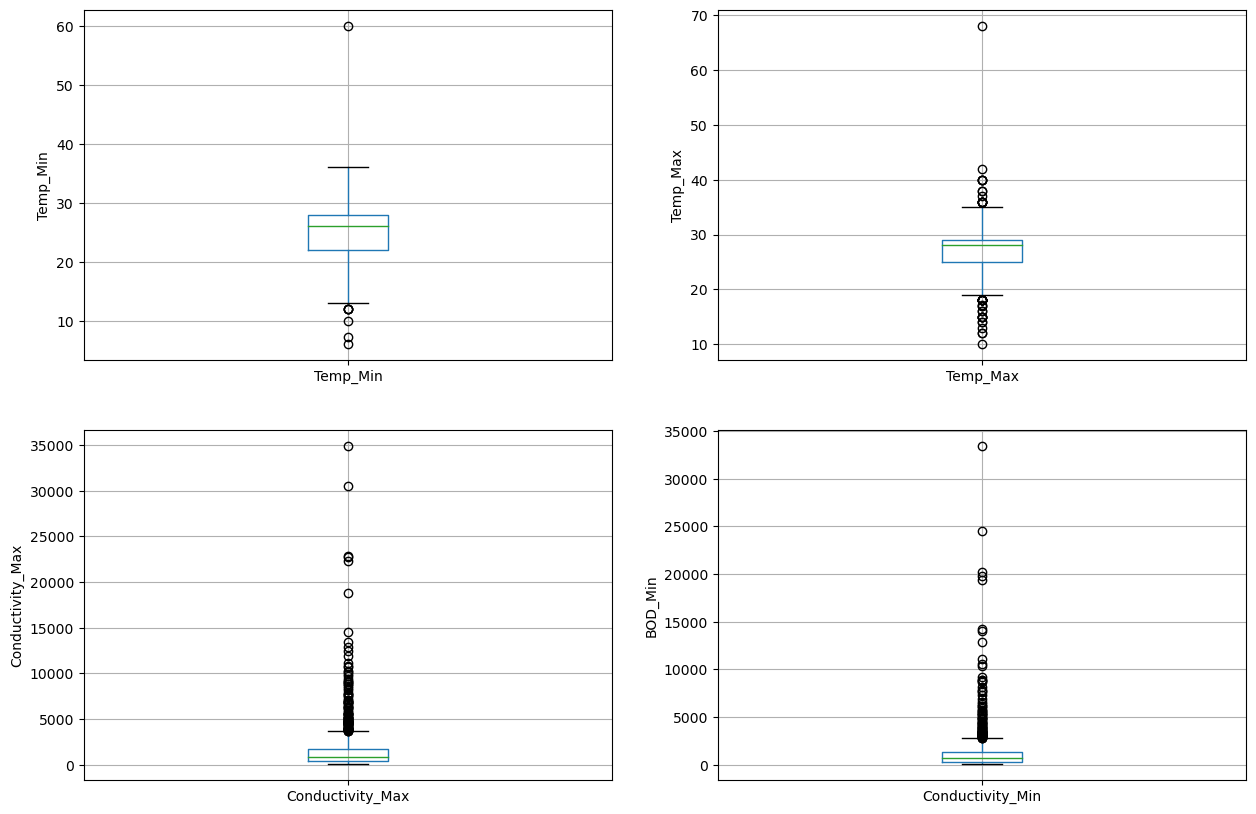

In [2365]:
# Plot the different attributes to look for outliers 

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Temp_Min')
fig.set_title('')
fig.set_ylabel('Temp_Min')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Temp_Max')
fig.set_title('')
fig.set_ylabel('Temp_Max')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='Conductivity_Max')
fig.set_title('')
fig.set_ylabel('Conductivity_Max')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='Conductivity_Min')
fig.set_title('')
fig.set_ylabel('BOD_Min')
plt.show()

In [2366]:
# find outliers for different  variables

lower_limit=df.Temp_Max.mean()- 9*df.Temp_Max.std()
upper_limit=df.Temp_Max.mean()+ 9*df.Temp_Max.std()

In [2367]:
# drop the rows containing values outside the cap
df.loc[df['Temp_Max']>upper_limit,'Temp_Max']=upper_limit
df.loc[df['Temp_Max']<lower_limit,'Temp_Max']=lower_limit

In [2368]:

lower_limit=df.Conductivity_Min.mean()- 9*df.Conductivity_Min.std()
upper_limit=df.Conductivity_Min.mean()+ 9*df.Conductivity_Min.std()

In [2369]:
df.loc[df['Conductivity_Min']>upper_limit,'Conductivity_Min']=upper_limit
df.loc[df['Conductivity_Min']<lower_limit,'Conductivity_Min']=lower_limit

In [2370]:

lower_limit=df.Conductivity_Max.mean()- 9*df.Conductivity_Max.std()
upper_limit=df.Conductivity_Max.mean()+ 9*df.Conductivity_Max.std()

In [2371]:
df.loc[df['Conductivity_Max']>upper_limit,'Conductivity_Max']=upper_limit
df.loc[df['Conductivity_Max']<lower_limit,'Conductivity_Max']=lower_limit

df2

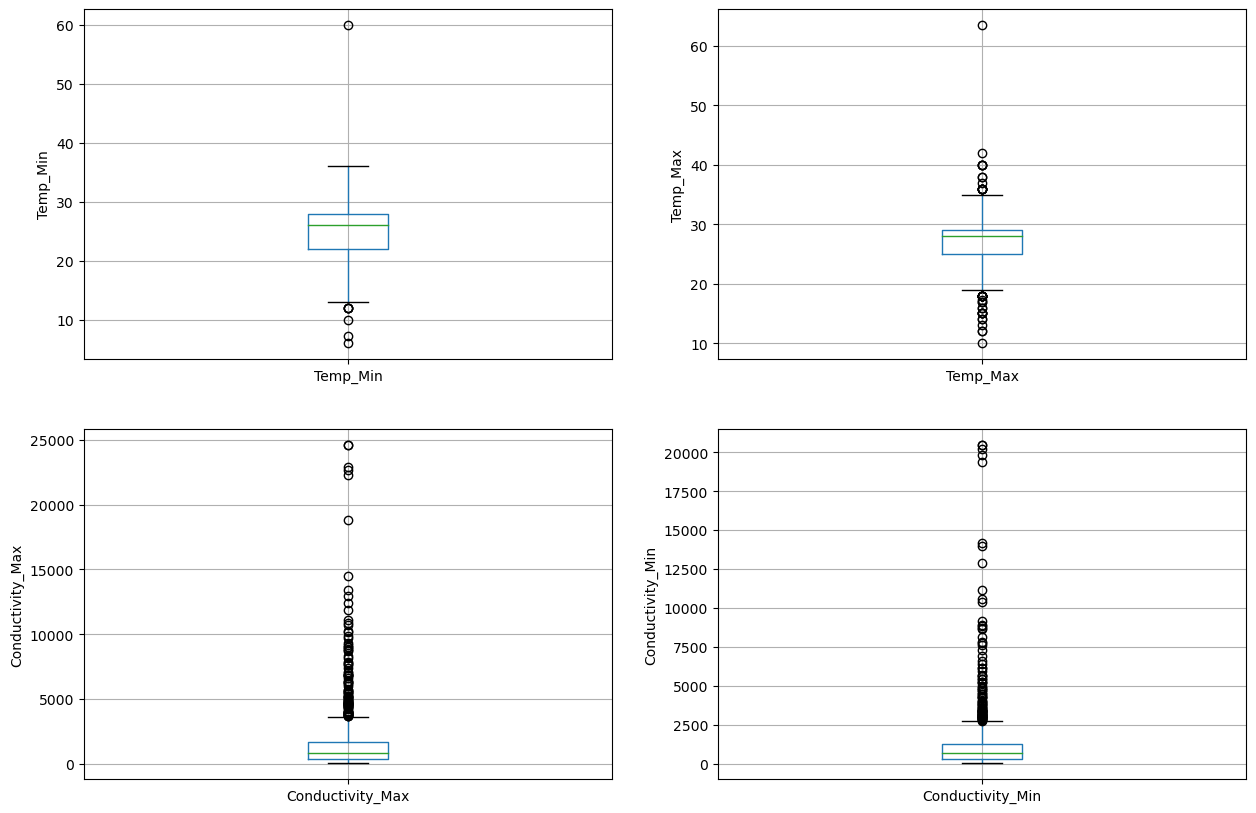

In [2372]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Temp_Min')
fig.set_title('')
fig.set_ylabel('Temp_Min')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Temp_Max')
fig.set_title('')
fig.set_ylabel('Temp_Max')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='Conductivity_Max')
fig.set_title('')
fig.set_ylabel('Conductivity_Max')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='Conductivity_Min')
fig.set_title('')
fig.set_ylabel('Conductivity_Min')
plt.show()

In [2373]:
pd.set_option('display.max_columns', None)
df.describe()

,Temp_Min,Temp_Max,pH_Min,pH_Max,Conductivity_Min,Conductivity_Max,BOD_Min,DOB_Max,Nitrate?N + Nitrite_N Min,Nitrate?N + Nitrite_N Max,Fecal Coliform_Min,Fecal Coliform_Max,Total Coliform_Min,Total Coliform_Max,Total Dissolved Solids_Min,Total Dissolved Solids_Max,Fluoride_Min,Fluoride_Max,Arsenic_Min,Arsenic_Max,Type_BORE WELL,Type_BOREWELL,Type_GROUND WATER,Type_GROUNDWATER,Type_HAND PUMP,Type_HANDPUMP,Type_INDUSTRIAL AREA,Type_OPEN WELL,Type_OPENWELL,Type_TUBE WELL,Type_TUBEWELL,Type_WELL,Type_nan,State Name N
count,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000
mean,25.037355,27.127253,7.098213,7.612887,1190.675277,1547.560882,0.871403,0.995532,2.044272,3.723374,26.536014,33.868901,59.291957,98.690259,782.081189,996.623727,1.154307,1.527431,0.001317,0.001423,0.056300,0.142091,0.159071,0.003575,0.065237,0.016086,0.015192,0.007149,0.008937,0.073280,0.016086,0.184987,0.252011,16.549598
std,4.058922,4.001827,2.011033,4.037174,1955.536122,2398.484219,8.109076,8.268724,3.515039,13.218285,160.092927,187.207863,259.600340,407.373775,1320.638468,1621.683944,25.110414,33.118338,0.003723,0.004149,0.230604,0.349300,0.365905,0.059708,0.247054,0.125862,0.122371,0.084288,0.094152,0.260712,0.125862,0.388460,0.434362,9.762153
min,6.000000,10.000000,-7.780000,-8.330000,43.000000,49.000000,0.000000,0.000000,0.000000,-9.980000,-28.000000,0.000000,0.000000,0.000000,28.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,25.000000,6.890000,7.190000,296.500000,360.500000,0.000000,0.000000,0.440000,0.700000,0.000000,0.000000,0.000000,0.000000,222.000000,294.500000,0.240000,0.280000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
50%,26.000000,28.000000,7.200000,7.470000,676.000000,870.500000,0.000000,0.000000,0.860000,1.595000,2.000000,2.000000,4.500000,8.000000,470.000000,578.000000,0.310000,0.415000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
75%,28.000000,29.050000,7.500000,7.810000,1282.500000,1690.000000,1.200000,1.200000,2.080000,3.995000,3.700000,5.500000,16.000000,23.000000,842.000000,1068.000000,0.470000,0.640000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,25.000000
max,60.000000,63.495937,32.650000,97.390000,20458.317436,24591.063312,269.000000,269.000000,36.240000,408.000000,2400.000000,3800.000000,3500.000000,7000.000000,23400.000000,23660.000000,840.000000,1108.000000,0.043000,0.043000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


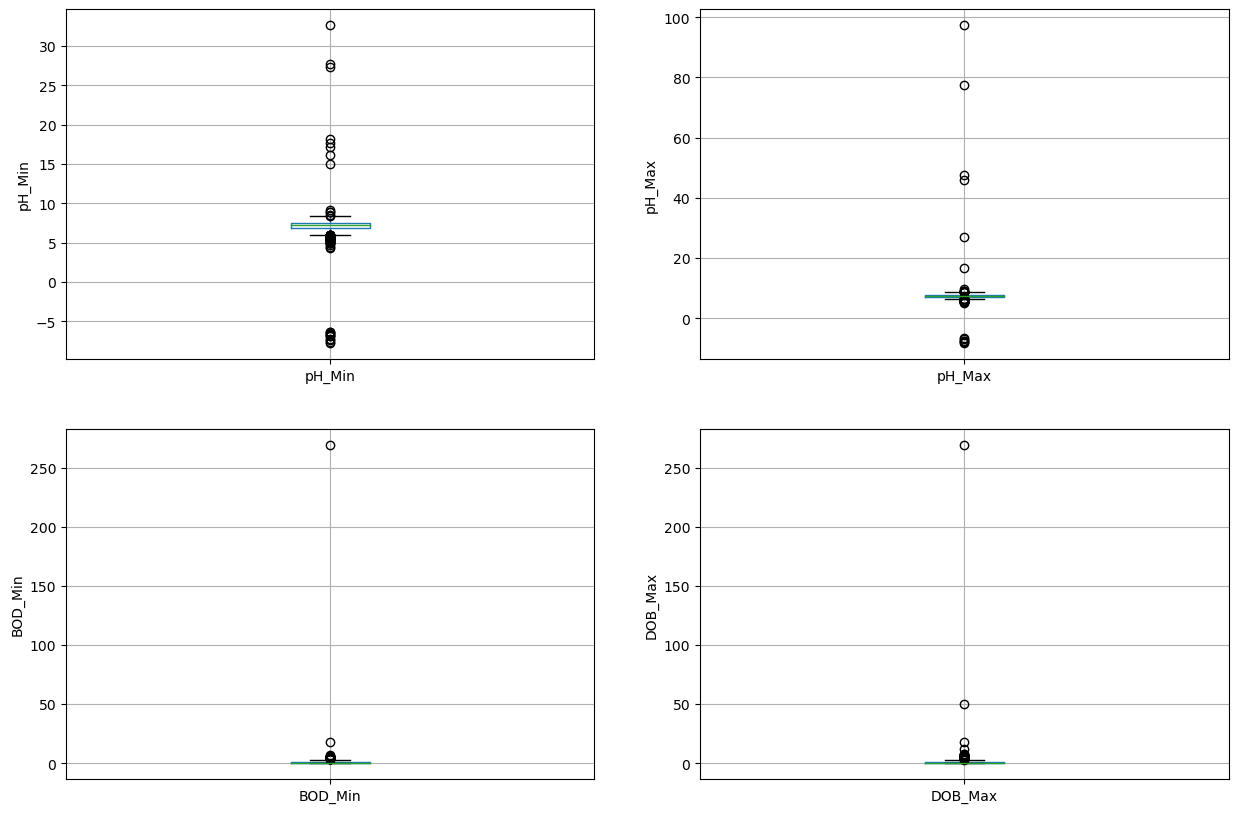

In [2374]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='pH_Min')
fig.set_title('')
fig.set_ylabel('pH_Min')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='pH_Max')
fig.set_title('')
fig.set_ylabel('pH_Max')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='BOD_Min')
fig.set_title('')
fig.set_ylabel('BOD_Min')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='DOB_Max')
fig.set_title('')
fig.set_ylabel('DOB_Max')
plt.show()

In [2375]:
q1=df.pH_Max.quantile(0.25)
q3=df.pH_Max.quantile(0.75)
IQR=q3-q1
lower_limit=q1- 10*IQR
upper_limit=q3 + 10*IQR

In [2376]:
df.drop(df[(df['pH_Min']>upper_limit)|(df['pH_Min']<lower_limit)].index,axis=0,inplace=True)

In [2377]:
df.loc[df['pH_Max']>upper_limit,'pH_Max']=upper_limit
df.loc[df['pH_Max']<lower_limit,'pH_Max']=lower_limit

In [2378]:
q1=df.pH_Min.quantile(0.25)
q3=df.pH_Min.quantile(0.75)
IQR=q3-q1
lower_limit=q1- 10*IQR
upper_limit=q3 + 10*IQR

In [2379]:
df.loc[df['pH_Min']>upper_limit,'pH_Min']=upper_limit
df.loc[df['pH_Min']<lower_limit,'pH_Min']=lower_limit

In [2380]:
q1=df['BOD_Min'].quantile(0.25)
q3=df['BOD_Min'].quantile(0.75)
IQR=q3-q1
lower_limit=q1- 3*IQR
upper_limit=q3 + 3*IQR

In [2381]:
df.loc[df['BOD_Min']>upper_limit,'BOD_Min']=upper_limit
df.loc[df['BOD_Min']<lower_limit,'BOD_Min']=lower_limit

In [2382]:
q1=df['DOB_Max'].quantile(0.25)
q3=df['DOB_Max'].quantile(0.75)
IQR=q3-q1
lower_limit=q1- 3*IQR
upper_limit=q3 + 3*IQR

In [2383]:
df.loc[df['DOB_Max']>upper_limit,'DOB_Max']=upper_limit
df.loc[df['DOB_Max']<lower_limit,'DOB_Max']=lower_limit

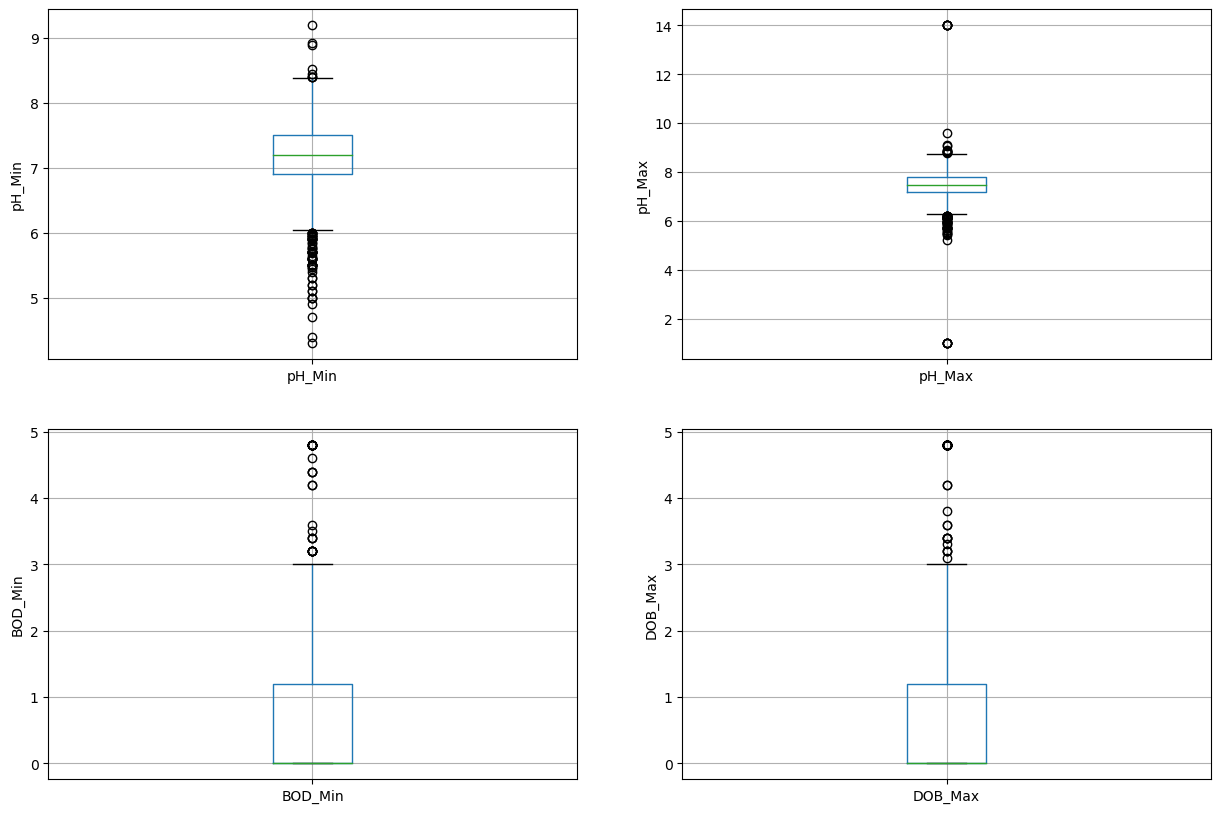

In [2384]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='pH_Min')
fig.set_title('')
fig.set_ylabel('pH_Min')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='pH_Max')
fig.set_title('')
fig.set_ylabel('pH_Max')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='BOD_Min')
fig.set_title('')
fig.set_ylabel('BOD_Min')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='DOB_Max')
fig.set_title('')
fig.set_ylabel('DOB_Max')
plt.show()

In [2385]:
df.describe()

,Temp_Min,Temp_Max,pH_Min,pH_Max,Conductivity_Min,Conductivity_Max,BOD_Min,DOB_Max,Nitrate?N + Nitrite_N Min,Nitrate?N + Nitrite_N Max,Fecal Coliform_Min,Fecal Coliform_Max,Total Coliform_Min,Total Coliform_Max,Total Dissolved Solids_Min,Total Dissolved Solids_Max,Fluoride_Min,Fluoride_Max,Arsenic_Min,Arsenic_Max,Type_BORE WELL,Type_BOREWELL,Type_GROUND WATER,Type_GROUNDWATER,Type_HAND PUMP,Type_HANDPUMP,Type_INDUSTRIAL AREA,Type_OPEN WELL,Type_OPENWELL,Type_TUBE WELL,Type_TUBEWELL,Type_WELL,Type_nan,State Name N
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,25.031818,27.141269,7.133891,7.455245,1195.520577,1552.409206,0.619182,0.676818,2.050664,3.752218,26.952545,34.399364,60.100455,100.139455,785.901091,999.679955,1.168836,1.547332,0.001304,0.001401,0.056364,0.140000,0.160000,0.003636,0.065455,0.015455,0.015455,0.007273,0.008182,0.072727,0.016364,0.185455,0.253636,16.543636
std,4.065175,4.006366,0.590578,0.890039,1969.472627,2412.634729,1.044090,1.152123,3.527745,13.324190,161.438243,188.773418,261.733928,410.706814,1330.358548,1630.861435,25.326261,33.402998,0.003719,0.004118,0.230727,0.347145,0.366773,0.060220,0.247439,0.123408,0.123408,0.085008,0.090124,0.259806,0.126927,0.388843,0.435290,9.748750
min,6.000000,10.000000,4.300000,0.990000,43.000000,49.000000,0.000000,0.000000,0.000000,-9.980000,-28.000000,0.000000,0.000000,0.000000,28.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,25.000000,6.900000,7.190000,297.250000,360.750000,0.000000,0.000000,0.447500,0.707500,0.000000,0.000000,0.000000,0.000000,224.250000,300.250000,0.240000,0.280000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
50%,26.000000,28.000000,7.200000,7.470000,676.000000,870.500000,0.000000,0.000000,0.860000,1.595000,2.000000,2.000000,4.500000,8.000000,470.000000,578.000000,0.310000,0.415000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
75%,28.000000,29.200000,7.500000,7.810000,1278.750000,1690.000000,1.200000,1.200000,2.092500,4.022500,3.700000,5.625000,17.000000,23.000000,845.500000,1067.500000,0.470000,0.640000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,25.000000
max,60.000000,63.495937,9.200000,14.010000,20458.317436,24591.063312,4.800000,4.800000,36.240000,408.000000,2400.000000,3800.000000,3500.000000,7000.000000,23400.000000,23660.000000,840.000000,1108.000000,0.043000,0.043000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


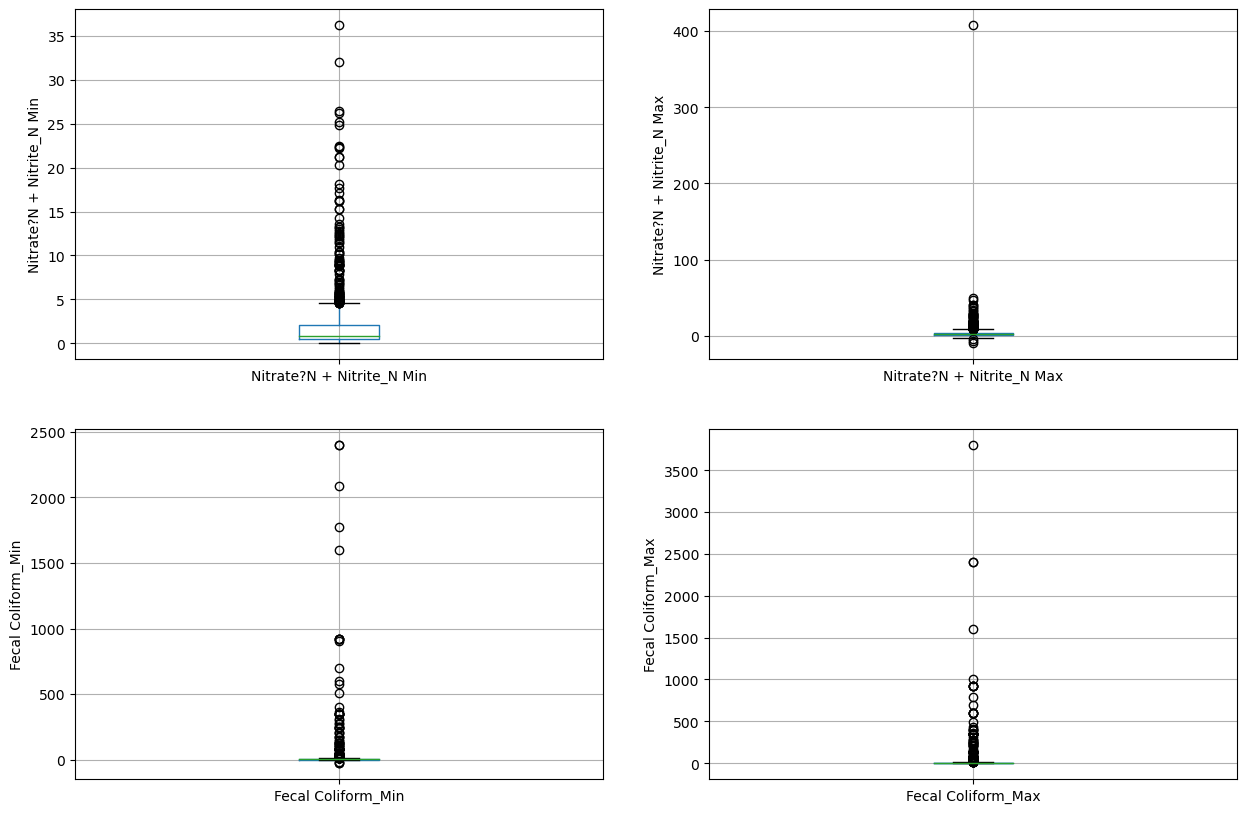

In [2386]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Nitrate?N + Nitrite_N Min')
fig.set_title('')
fig.set_ylabel('Nitrate?N + Nitrite_N Min')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Nitrate?N + Nitrite_N Max')
fig.set_title('')
fig.set_ylabel('Nitrate?N + Nitrite_N Max')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='Fecal Coliform_Min')
fig.set_title('')
fig.set_ylabel('Fecal Coliform_Min')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='Fecal Coliform_Max')
fig.set_title('')
fig.set_ylabel('Fecal Coliform_Max')
plt.show()

In [2387]:
q1=df['Nitrate?N + Nitrite_N Max'].quantile(0.25)
q3=df['Nitrate?N + Nitrite_N Max'].quantile(0.75)
IQR=q3-q1
lower_limit=df['Nitrate?N + Nitrite_N Max'].mean()- 2*df['Nitrate?N + Nitrite_N Max'].std()
upper_limit=df['Nitrate?N + Nitrite_N Max'].mean()+ 3*df['Nitrate?N + Nitrite_N Max'].std()

In [2388]:
df.loc[df['Nitrate?N + Nitrite_N Max']>upper_limit,'Nitrate?N + Nitrite_N Max']=upper_limit
df.loc[df['Nitrate?N + Nitrite_N Max']<lower_limit,'Nitrate?N + Nitrite_N Max']=lower_limit

In [2389]:

lower_limit=df['Total Coliform_Max'].mean()- 2*df['Total Coliform_Max'].std()
upper_limit=df['Total Coliform_Max'].mean()+ 15*df['Total Coliform_Max'].std()

In [2390]:
df.loc[df['Total Coliform_Max']>upper_limit,'Total Coliform_Max']=upper_limit
df.loc[df['Total Coliform_Max']<lower_limit,'Total Coliform_Max']=lower_limit

In [2391]:

lower_limit=df['Fecal Coliform_Max'].mean()- 2*df['Fecal Coliform_Max'].std()
upper_limit=df['Fecal Coliform_Max'].mean()+ 30*df['Fecal Coliform_Max'].std()

In [2392]:
df.loc[df['Fecal Coliform_Max']>upper_limit,'Fecal Coliform_Max']=upper_limit
df.loc[df['Fecal Coliform_Max']<lower_limit,'Fecal Coliform_Max']=lower_limit

In [2393]:
q1=df['Fecal Coliform_Min'].quantile(0.25)
q3=df['Fecal Coliform_Min'].quantile(0.75)
IQR=q3-q1
lower_limit=df['Fecal Coliform_Min'].mean()- 2*df['Fecal Coliform_Min'].std()
upper_limit=df['Fecal Coliform_Min'].mean()+ 10*df['Fecal Coliform_Min'].std()

In [2394]:
df.loc[df['Fecal Coliform_Min']>upper_limit,'Fecal Coliform_Min']=upper_limit
df.loc[df['Fecal Coliform_Min']<lower_limit,'Fecal Coliform_Min']=lower_limit

In [2395]:
lower_limit=df['Total Dissolved Solids_Min'].mean()- 2*df['Total Dissolved Solids_Min'].std()
upper_limit=df['Total Dissolved Solids_Min'].mean()+ 5*df['Total Dissolved Solids_Min'].std()

In [2396]:
df.loc[df['Total Dissolved Solids_Min']>upper_limit,'Total Dissolved Solids_Min']=upper_limit
df.loc[df['Total Dissolved Solids_Min']<lower_limit,'Total Dissolved Solids_Min']=lower_limit

In [2397]:
lower_limit=df['Total Dissolved Solids_Max'].mean()- 2*df['Total Dissolved Solids_Max'].std()
upper_limit=df['Total Dissolved Solids_Max'].mean()+ 5*df['Total Dissolved Solids_Max'].std()

In [2398]:
df.loc[df['Total Dissolved Solids_Max']>upper_limit,'Total Dissolved Solids_Max']=upper_limit
df.loc[df['Total Dissolved Solids_Max']<lower_limit,'Total Dissolved Solids_Max']=lower_limit

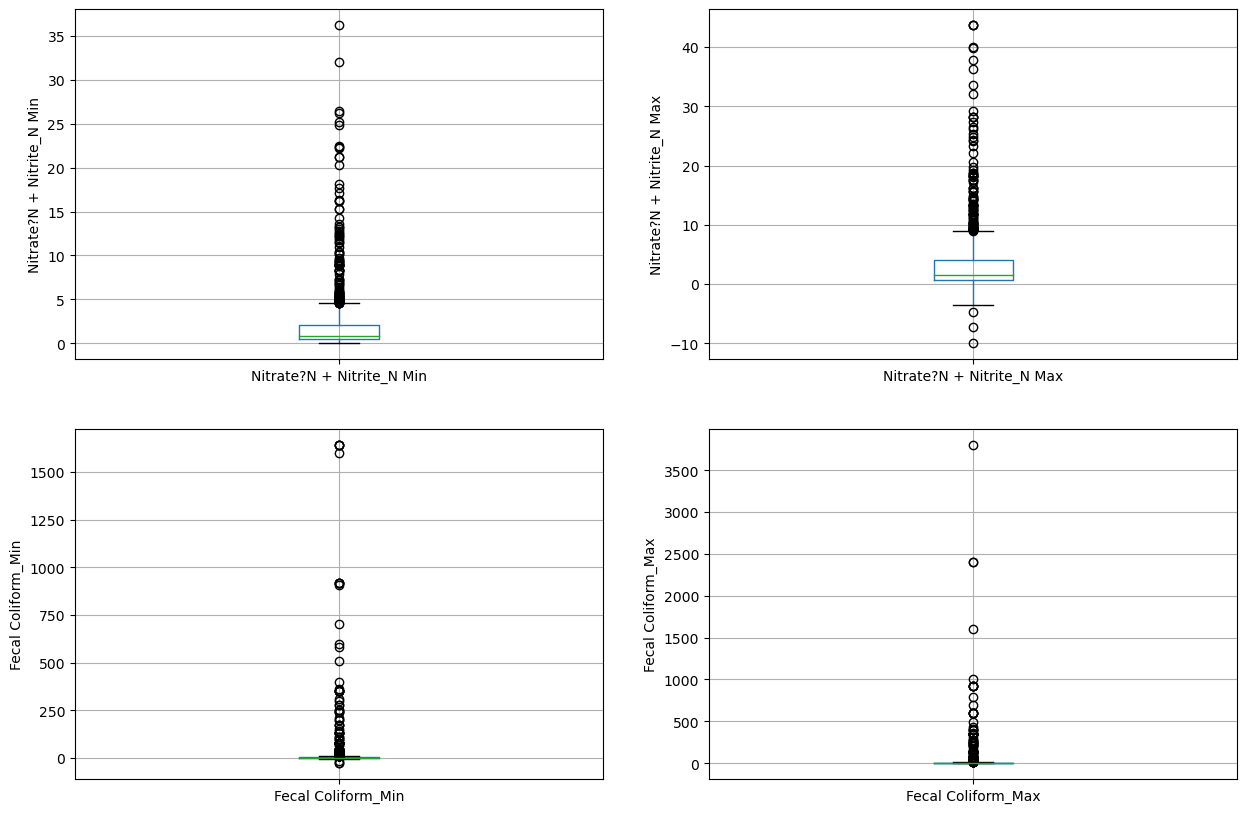

In [2399]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Nitrate?N + Nitrite_N Min')
fig.set_title('')
fig.set_ylabel('Nitrate?N + Nitrite_N Min')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Nitrate?N + Nitrite_N Max')
fig.set_title('')
fig.set_ylabel('Nitrate?N + Nitrite_N Max')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='Fecal Coliform_Min')
fig.set_title('')
fig.set_ylabel('Fecal Coliform_Min')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='Fecal Coliform_Max')
fig.set_title('')
fig.set_ylabel('Fecal Coliform_Max')
plt.show()

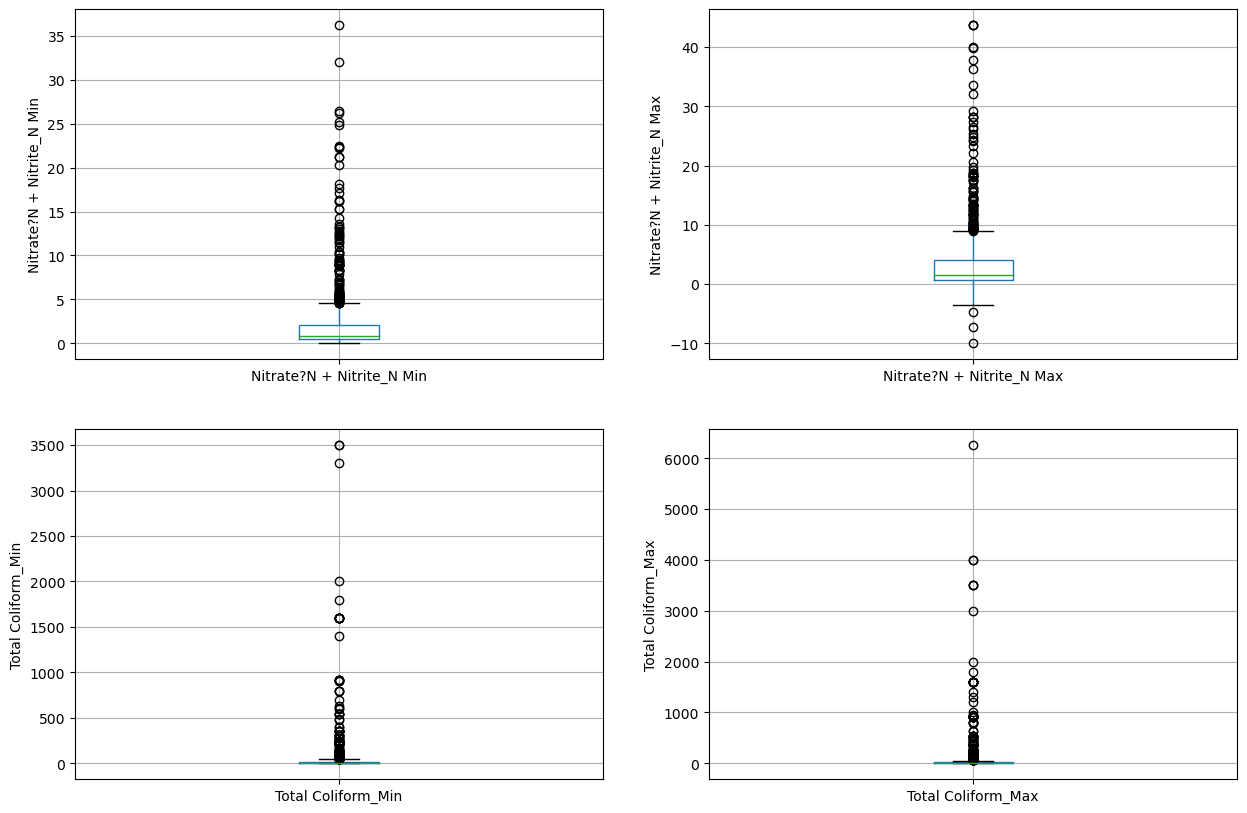

In [2400]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Nitrate?N + Nitrite_N Min')
fig.set_title('')
fig.set_ylabel('Nitrate?N + Nitrite_N Min')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Nitrate?N + Nitrite_N Max')
fig.set_title('')
fig.set_ylabel('Nitrate?N + Nitrite_N Max')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='Total Coliform_Min')
fig.set_title('')
fig.set_ylabel('Total Coliform_Min')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='Total Coliform_Max')
fig.set_title('')
fig.set_ylabel('Total Coliform_Max')
plt.show()

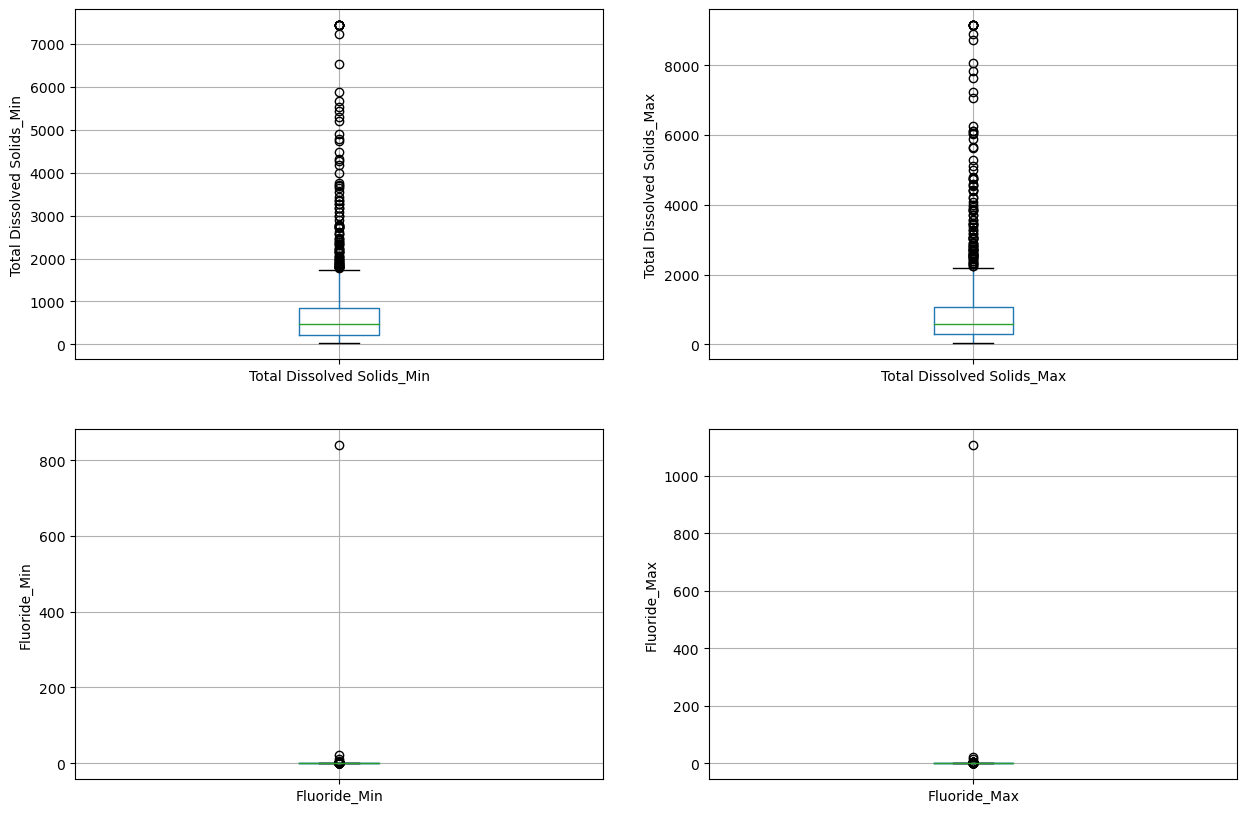

In [2401]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Total Dissolved Solids_Min')
fig.set_title('')
fig.set_ylabel('Total Dissolved Solids_Min')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Total Dissolved Solids_Max')
fig.set_title('')
fig.set_ylabel('Total Dissolved Solids_Max')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='Fluoride_Min')
fig.set_title('')
fig.set_ylabel('Fluoride_Min')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='Fluoride_Max')
fig.set_title('')
fig.set_ylabel('Fluoride_Max')
plt.show()

In [2402]:
q1=df['Fluoride_Min'].quantile(0.25)
q3=df['Fluoride_Min'].quantile(0.75)
IQR=q3-q1
lower_limit=q1- 2*IQR
upper_limit=q3 + 15*IQR

In [2403]:
df.loc[df['Fluoride_Min']>upper_limit,'Fluoride_Min']=upper_limit
df.loc[df['Fluoride_Min']<lower_limit,'Fluoride_Min']=lower_limit

In [2404]:
q1=df['Fluoride_Max'].quantile(0.25)
q3=df['Fluoride_Max'].quantile(0.75)
IQR=q3-q1
lower_limit=q1- 2*IQR
upper_limit=q3 + 15*IQR

In [2405]:
df.loc[df['Fluoride_Max']>upper_limit,'Fluoride_Max']=upper_limit
df.loc[df['Fluoride_Max']<lower_limit,'Fluoride_Max']=lower_limit

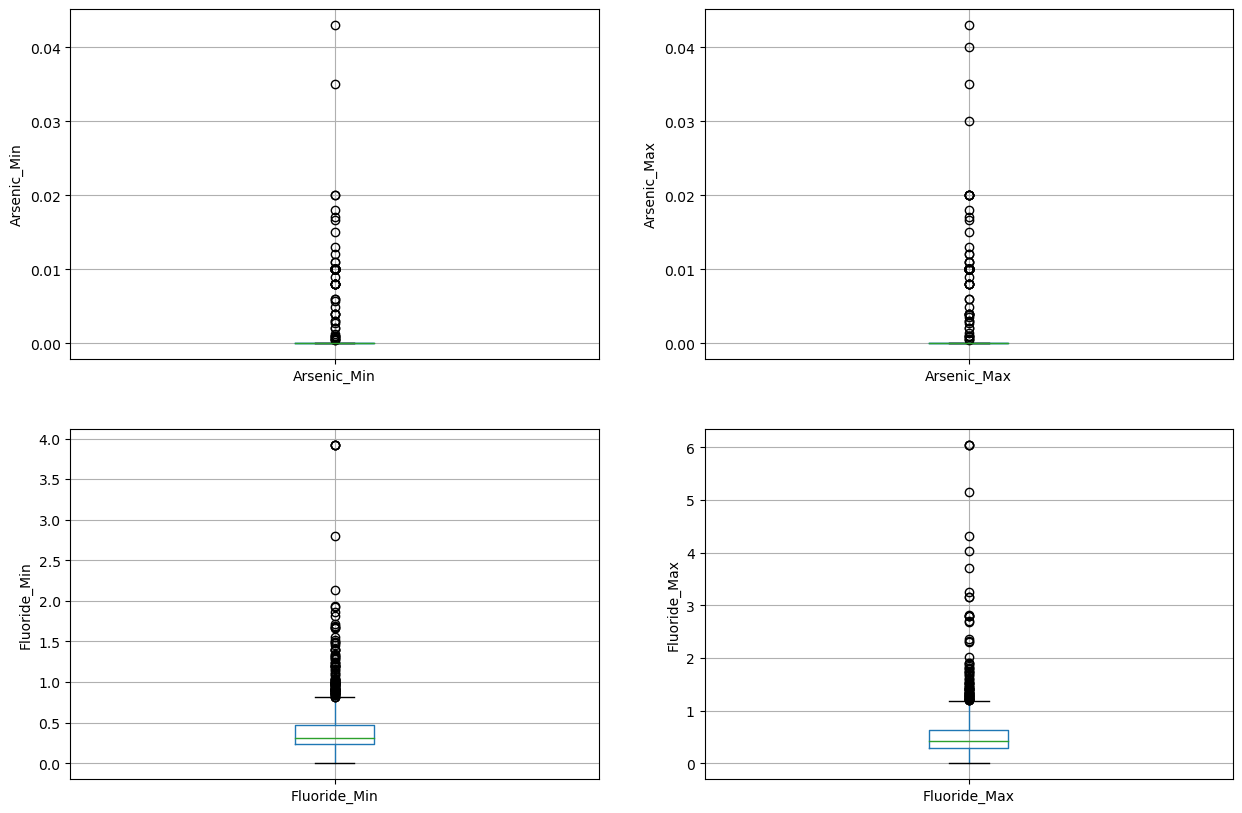

In [2406]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Arsenic_Min')
fig.set_title('')
fig.set_ylabel('Arsenic_Min')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Arsenic_Max')
fig.set_title('')
fig.set_ylabel('Arsenic_Max')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='Fluoride_Min')
fig.set_title('')
fig.set_ylabel('Fluoride_Min')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='Fluoride_Max')
fig.set_title('')
fig.set_ylabel('Fluoride_Max')
plt.show()

In [2407]:
df.describe()

,Temp_Min,Temp_Max,pH_Min,pH_Max,Conductivity_Min,Conductivity_Max,BOD_Min,DOB_Max,Nitrate?N + Nitrite_N Min,Nitrate?N + Nitrite_N Max,Fecal Coliform_Min,Fecal Coliform_Max,Total Coliform_Min,Total Coliform_Max,Total Dissolved Solids_Min,Total Dissolved Solids_Max,Fluoride_Min,Fluoride_Max,Arsenic_Min,Arsenic_Max,Type_BORE WELL,Type_BOREWELL,Type_GROUND WATER,Type_GROUNDWATER,Type_HAND PUMP,Type_HANDPUMP,Type_INDUSTRIAL AREA,Type_OPEN WELL,Type_OPENWELL,Type_TUBE WELL,Type_TUBEWELL,Type_WELL,Type_nan,State Name N
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,25.031818,27.141269,7.133891,7.455245,1195.520577,1552.409206,0.619182,0.676818,2.050664,3.413559,25.043764,34.399364,60.100455,99.467402,752.778864,961.278054,0.386782,0.524714,0.001304,0.001401,0.056364,0.140000,0.160000,0.003636,0.065455,0.015455,0.015455,0.007273,0.008182,0.072727,0.016364,0.185455,0.253636,16.543636
std,4.065175,4.006366,0.590578,0.890039,1969.472627,2412.634729,1.044090,1.152123,3.527745,5.435360,136.540003,188.773418,261.733928,399.867884,1003.545692,1284.921208,0.389770,0.577317,0.003719,0.004118,0.230727,0.347145,0.366773,0.060220,0.247439,0.123408,0.123408,0.085008,0.090124,0.259806,0.126927,0.388843,0.435290,9.748750
min,6.000000,10.000000,4.300000,0.990000,43.000000,49.000000,0.000000,0.000000,0.000000,-9.980000,-28.000000,0.000000,0.000000,0.000000,28.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,25.000000,6.900000,7.190000,297.250000,360.750000,0.000000,0.000000,0.447500,0.707500,0.000000,0.000000,0.000000,0.000000,224.250000,300.250000,0.240000,0.280000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
50%,26.000000,28.000000,7.200000,7.470000,676.000000,870.500000,0.000000,0.000000,0.860000,1.595000,2.000000,2.000000,4.500000,8.000000,470.000000,578.000000,0.310000,0.415000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
75%,28.000000,29.200000,7.500000,7.810000,1278.750000,1690.000000,1.200000,1.200000,2.092500,4.022500,3.700000,5.625000,17.000000,23.000000,845.500000,1067.500000,0.470000,0.640000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,25.000000
max,60.000000,63.495937,9.200000,14.010000,20458.317436,24591.063312,4.800000,4.800000,36.240000,43.724788,1641.334980,3800.000000,3500.000000,6260.741663,7437.693830,9153.987128,3.920000,6.040000,0.043000,0.043000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


In [2408]:
import seaborn as sns

In [2409]:
df.shape


(1100, 35)

In [2410]:
lb=LabelEncoder()
df['DrinkabilityN']=lb.fit_transform(df['Drinkability'])

df1['DrinkabilityN']=lb.fit_transform(df1['Drinkability'])

df.drop(columns=['Drinkability'],axis=1,inplace=True)

df1.drop(columns=['Drinkability'],axis=1,inplace=True)

In [2411]:

df2=df['DrinkabilityN']
df3=df1['DrinkabilityN']
df.drop(columns=['DrinkabilityN'],axis=1,inplace=True)
df1.drop(columns=['DrinkabilityN'],axis=1,inplace=True)

In [2412]:
from sklearn.model_selection import train_test_split

In [2413]:
df2.value_counts()

DrinkabilityN
1    597
0    503
Name: count, dtype: int64

In [2414]:
df.describe()

,Temp_Min,Temp_Max,pH_Min,pH_Max,Conductivity_Min,Conductivity_Max,BOD_Min,DOB_Max,Nitrate?N + Nitrite_N Min,Nitrate?N + Nitrite_N Max,Fecal Coliform_Min,Fecal Coliform_Max,Total Coliform_Min,Total Coliform_Max,Total Dissolved Solids_Min,Total Dissolved Solids_Max,Fluoride_Min,Fluoride_Max,Arsenic_Min,Arsenic_Max,Type_BORE WELL,Type_BOREWELL,Type_GROUND WATER,Type_GROUNDWATER,Type_HAND PUMP,Type_HANDPUMP,Type_INDUSTRIAL AREA,Type_OPEN WELL,Type_OPENWELL,Type_TUBE WELL,Type_TUBEWELL,Type_WELL,Type_nan,State Name N
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,25.031818,27.141269,7.133891,7.455245,1195.520577,1552.409206,0.619182,0.676818,2.050664,3.413559,25.043764,34.399364,60.100455,99.467402,752.778864,961.278054,0.386782,0.524714,0.001304,0.001401,0.056364,0.140000,0.160000,0.003636,0.065455,0.015455,0.015455,0.007273,0.008182,0.072727,0.016364,0.185455,0.253636,16.543636
std,4.065175,4.006366,0.590578,0.890039,1969.472627,2412.634729,1.044090,1.152123,3.527745,5.435360,136.540003,188.773418,261.733928,399.867884,1003.545692,1284.921208,0.389770,0.577317,0.003719,0.004118,0.230727,0.347145,0.366773,0.060220,0.247439,0.123408,0.123408,0.085008,0.090124,0.259806,0.126927,0.388843,0.435290,9.748750
min,6.000000,10.000000,4.300000,0.990000,43.000000,49.000000,0.000000,0.000000,0.000000,-9.980000,-28.000000,0.000000,0.000000,0.000000,28.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,25.000000,6.900000,7.190000,297.250000,360.750000,0.000000,0.000000,0.447500,0.707500,0.000000,0.000000,0.000000,0.000000,224.250000,300.250000,0.240000,0.280000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
50%,26.000000,28.000000,7.200000,7.470000,676.000000,870.500000,0.000000,0.000000,0.860000,1.595000,2.000000,2.000000,4.500000,8.000000,470.000000,578.000000,0.310000,0.415000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
75%,28.000000,29.200000,7.500000,7.810000,1278.750000,1690.000000,1.200000,1.200000,2.092500,4.022500,3.700000,5.625000,17.000000,23.000000,845.500000,1067.500000,0.470000,0.640000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,25.000000
max,60.000000,63.495937,9.200000,14.010000,20458.317436,24591.063312,4.800000,4.800000,36.240000,43.724788,1641.334980,3800.000000,3500.000000,6260.741663,7437.693830,9153.987128,3.920000,6.040000,0.043000,0.043000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


In [2415]:
x_train,x_test,y_train,y_test=train_test_split(df,df2,test_size=0.3)

x_train1,x_test1,y_train1,y_test1=train_test_split(df1,df3,test_size=0.3)



# LOGISTIC REGRESSION

In [2416]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np


In [2417]:
import statsmodels.api as sm

logit = sm.Logit(y_train, x_train)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.124417
         Iterations 19


In [2418]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
=================================================================================
Model:                   Logit                 Method:                MLE        
Dependent Variable:      DrinkabilityN         Pseudo R-squared:      0.819      
Date:                    2024-01-22 23:58      AIC:                   259.6029   
No. Observations:        770                   BIC:                   417.5802   
Df Model:                33                    Log-Likelihood:        -95.801    
Df Residuals:            736                   LL-Null:               -529.97    
Converged:               1.0000                LLR p-value:           4.2532e-161
No. Iterations:          19.0000               Scale:                 1.0000     
---------------------------------------------------------------------------------
                             Coef.   Std.Err.    z    P>|z|    [0.025     0.975] 
---------------------------------------------------------------------------------
Temp_Min                     -0.0174   0.0844 -0.2064 0.8365    -0.1829    0.1480
Temp_Max                     -0.0925   0.0896 -1.0319 0.3021    -0.2681    0.0831
pH_Min                       -1.5334   0.4944 -3.1018 0.0019    -2.5023   -0.5645
pH_Max                        0.3385   0.2703  1.2523 0.2104    -0.1913    0.8683
Conductivity_Min              0.0006   0.0013  0.4932 0.6218    -0.0018    0.0031
Conductivity_Max              0.0036   0.0008  4.7000 0.0000     0.0021    0.0051
BOD_Min                      -4.7013   1.9199 -2.4488 0.0143    -8.4642   -0.9385
DOB_Max                       4.9180   1.8091  2.7184 0.0066     1.3721    8.4639
Nitrate?N + Nitrite_N Min    -0.1459   0.1601 -0.9113 0.3621    -0.4598    0.1679
Nitrate?N + Nitrite_N Max    -0.0585   0.0688 -0.8503 0.3952    -0.1932    0.0763
Fecal Coliform_Min           -0.0290   0.0112 -2.5814 0.0098    -0.0510   -0.0070
Fecal Coliform_Max           -0.0007   0.0234 -0.0305 0.9757    -0.0465    0.0451
Total Coliform_Min           -0.0527   0.0174 -3.0247 0.0025    -0.0869   -0.0186
Total Coliform_Max            0.1084   0.0190  5.7085 0.0000     0.0712    0.1456
Total Dissolved Solids_Min    0.0219   0.0032  6.8135 0.0000     0.0156    0.0282
Total Dissolved Solids_Max   -0.0024   0.0010 -2.4730 0.0134    -0.0044   -0.0005
Fluoride_Min                  0.5774   1.6257  0.3551 0.7225    -2.6089    3.7637
Fluoride_Max                  1.8383   1.1758  1.5635 0.1179    -0.4662    4.1427
Arsenic_Min                -407.5179 748.7327 -0.5443 0.5863 -1875.0069 1059.9712
Arsenic_Max                 884.0133 741.5853  1.1921 0.2332  -569.4672 2337.4937
Type_BORE WELL               -3.0341   3.7267 -0.8141 0.4156   -10.3383    4.2702
Type_BOREWELL                -5.1265   3.5560 -1.4417 0.1494   -12.0961    1.8431
Type_GROUND WATER            -3.9904   3.3814 -1.1801 0.2380   -10.6178    2.6371
Type_GROUNDWATER             -9.7352 778.1003 -0.0125 0.9900 -1534.7837 1515.3134
Type_HAND PUMP               -4.3785   3.3035 -1.3254 0.1850   -10.8532    2.0962
Type_HANDPUMP                -4.8958   3.5399 -1.3830 0.1667   -11.8339    2.0424
Type_INDUSTRIAL AREA         -5.4229   3.5960 -1.5080 0.1316   -12.4710    1.6253
Type_OPEN WELL              -11.2958   3.8605 -2.9260 0.0034   -18.8621   -3.7294
Type_OPENWELL                 2.4855   3.6494  0.6811 0.4958    -4.6671    9.6381
Type_TUBE WELL               -3.5800   3.5047 -1.0215 0.3070   -10.4492    3.2891
Type_TUBEWELL                -0.8154   3.7412 -0.2179 0.8275    -8.1480    6.5173
Type_WELL                    -3.2607   3.3251 -0.9806 0.3268    -9.7777    3.2563
Type_nan                     -4.7432   3.3241 -1.4269 0.1536   -11.2583    1.7719
State Name N                  0.0388   0.0263  1.4774 0.1396    -0.0127    0.0903
=================================================================================

"""

In [2419]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [2420]:
significant_vars = get_significant_vars( logit_model )

significant_vars

['pH_Min',
 'Conductivity_Max',
 'BOD_Min',
 'DOB_Max',
 'Fecal Coliform_Min',
 'Total Coliform_Min',
 'Total Coliform_Max',
 'Total Dissolved Solids_Min',
 'Total Dissolved Solids_Max',
 'Type_OPEN WELL']

In [2421]:
final_logit = sm.Logit( y_train,
            sm.add_constant( x_train[significant_vars] ) ).fit()

Optimization terminated successfully.
         Current function value: 0.212168
         Iterations 11


In [2422]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                  Logit              Method:             MLE        
Dependent Variable:     DrinkabilityN      Pseudo R-squared:   0.692      
Date:                   2024-01-22 23:58   AIC:                348.7388   
No. Observations:       770                BIC:                399.8491   
Df Model:               10                 Log-Likelihood:     -163.37    
Df Residuals:           759                LL-Null:            -529.97    
Converged:              1.0000             LLR p-value:        4.6792e-151
No. Iterations:         11.0000            Scale:              1.0000     
--------------------------------------------------------------------------
                            Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
const                      -3.7341   2.0176 -1.8508 0.0642 -7.6885  0.2203
pH_Min                     -0.4806   0.2884 -1.6664 0.0956 -1.0458  0.0846
Conductivity_Max            0.0019   0.0004  4.5386 0.0000  0.0011  0.0027
BOD_Min                    -2.4269   1.3627 -1.7810 0.0749 -5.0976  0.2439
DOB_Max                     2.6886   1.2949  2.0763 0.0379  0.1507  5.2265
Fecal Coliform_Min         -0.0222   0.0079 -2.7948 0.0052 -0.0377 -0.0066
Total Coliform_Min         -0.0251   0.0131 -1.9204 0.0548 -0.0507  0.0005
Total Coliform_Max          0.0566   0.0124  4.5818 0.0000  0.0324  0.0808
Total Dissolved Solids_Min  0.0118   0.0012  9.4247 0.0000  0.0093  0.0142
Total Dissolved Solids_Max -0.0014   0.0007 -2.1440 0.0320 -0.0027 -0.0001
Type_OPEN WELL             -4.1352   1.2734 -3.2474 0.0012 -6.6309 -1.6394
==========================================================================

"""

In [2423]:
y_pred_df = pd.DataFrame( { "actual": y_test,
                            "predicted_prob": final_logit.predict(
                        sm.add_constant( x_test[significant_vars] ) ) } )

In [2424]:
y_pred_df.sample(10, random_state = 42)

,actual,predicted_prob
104,1,0.972191
823,1,1.000000
805,1,0.996375
361,0,0.208497
412,1,0.744310
51,0,0.083141
314,1,1.000000
252,1,0.789055
877,1,1.000000
735,1,0.999853


In [2425]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(
                            lambda x: 1 if x > 0.5 else 0)

y_pred_df.sample(10, random_state = 42)

,actual,predicted_prob,predicted
104,1,0.972191,1
823,1,1.000000,1
805,1,0.996375,1
361,0,0.208497,0
412,1,0.744310,1
51,0,0.083141,0
314,1,1.000000,1
252,1,0.789055,1
877,1,1.000000,1
735,1,0.999853,1


In [2426]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn import metrics

In [2427]:
def draw_cm( actual, predicted ):
    ## Cret
    cm = metrics.confusion_matrix( actual, predicted)
    sn.heatmap(cm, annot=True,  fmt='.2f',
               xticklabels = ["POSITIVE", "NEGATIVE"] ,
               yticklabels = ["POSITIVE", "NEGATIVE"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

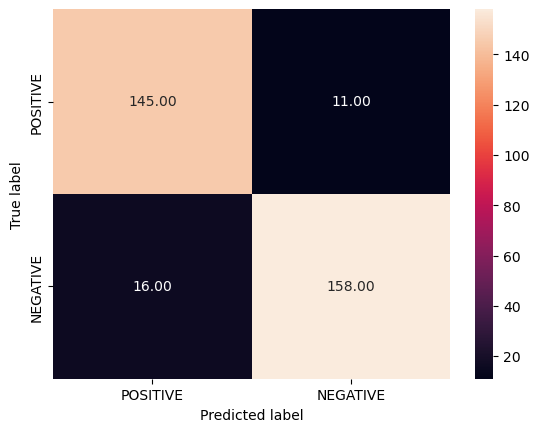

In [2428]:
draw_cm( y_pred_df.actual,
        y_pred_df.predicted )

In [2429]:
print( metrics.classification_report( y_pred_df.actual,
                                     y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       156
           1       0.93      0.91      0.92       174

    accuracy                           0.92       330
   macro avg       0.92      0.92      0.92       330
weighted avg       0.92      0.92      0.92       330



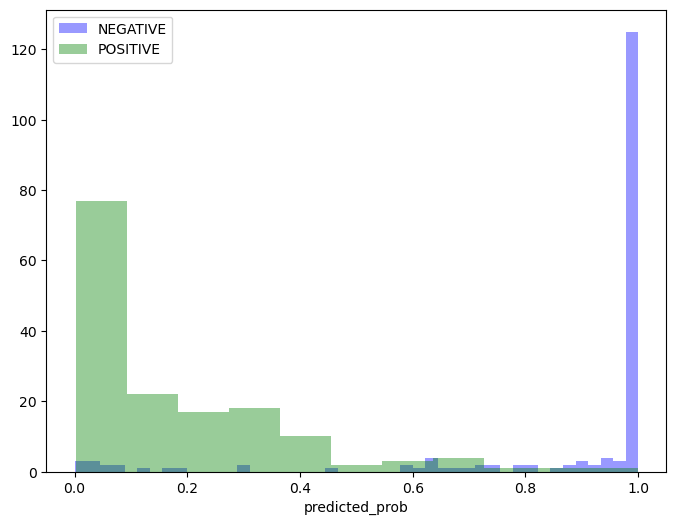

In [2430]:
plt.figure( figsize = (8,6) )
sn.distplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"],
            kde=False, color = 'b',
            label = 'NEGATIVE' )
sn.distplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"],
            kde=False, color = 'g',
            label = 'POSITIVE' )
plt.legend()
plt.show()

In [2431]:
def draw_roc( actual, probs ):
    fpr, \
    tpr, \
    thresholds = metrics.roc_curve( actual,
                                    probs,
                                    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

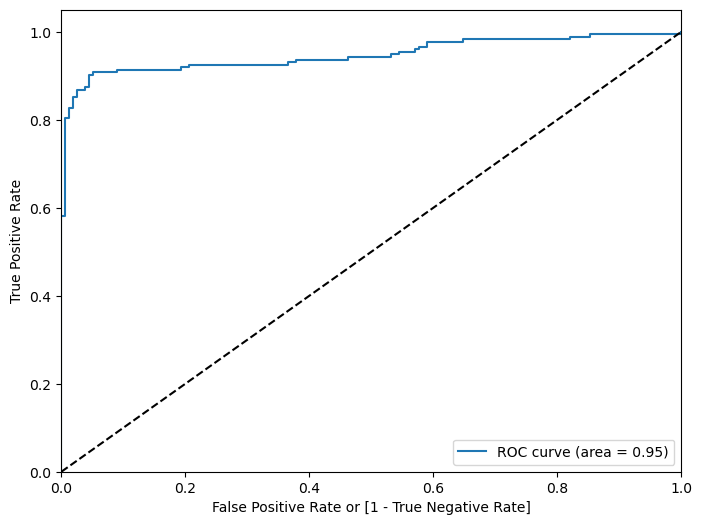

In [2432]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual,
                                 y_pred_df.predicted_prob)

In [2433]:
auc_score = metrics.roc_auc_score( y_pred_df.actual,
                                  y_pred_df.predicted_prob  )
round( float( auc_score ), 2 )

0.95

In [2434]:
tpr_fpr = pd.DataFrame( { 'tpr': tpr,
                         'fpr': fpr,
                         'thresholds': thresholds } )

tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr
tpr_fpr.sort_values( 'diff', ascending = False )[0:5]

,tpr,fpr,thresholds,diff
149,0.902299,0.044872,0.592898,0.857427
151,0.908046,0.051282,0.580593,0.856764
148,0.896552,0.044872,0.603230,0.851680
150,0.902299,0.051282,0.591738,0.851017
152,0.908046,0.057692,0.553216,0.850354


In [2435]:
y_pred_df['predicted_new'] = y_pred_df.predicted_prob.map(
                                lambda x: 1 if x > 0.6 else 0)

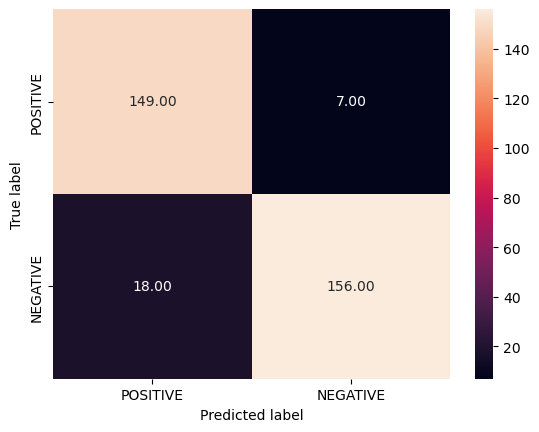

In [2436]:
draw_cm( y_pred_df.actual,
        y_pred_df.predicted_new)

In [2437]:
print(metrics.classification_report( y_pred_df.actual,
                                     y_pred_df.predicted_new ))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       156
           1       0.96      0.90      0.93       174

    accuracy                           0.92       330
   macro avg       0.92      0.93      0.92       330
weighted avg       0.93      0.92      0.92       330



In [2438]:
def get_total_cost( actual, predicted, cost_FPs, cost_FNs ):
    cm = metrics.confusion_matrix( actual, predicted)
    cm_mat = np.array( cm )
    return cm_mat[0,1] * cost_FNs + cm_mat[1,0] * cost_FPs

In [2439]:
cost_df = pd.DataFrame( columns = ['prob', 'cost'])

In [2440]:
idx = 0

## iterate cut-off probability values between 0.1 and 0.5
for each_prob in range( 10, 50):
    cost = get_total_cost( y_pred_df.actual,
                          y_pred_df.predicted_prob.map(
            lambda x: 1 if x > (each_prob/100)  else 0), 1, 5 )
    cost_df.loc[idx] = [(each_prob/100), cost]
    idx += 1

In [2441]:
cost_df.sort_values( 'cost', ascending = True )[0:5]

,prob,cost
39,0.49,76.0
36,0.46,76.0
38,0.48,76.0
37,0.47,76.0
35,0.45,86.0


In [2442]:
y_pred_df['predicted_using_cost'] = y_pred_df.predicted_prob.map(
    lambda x: 1 if x > 0.6 else 0)

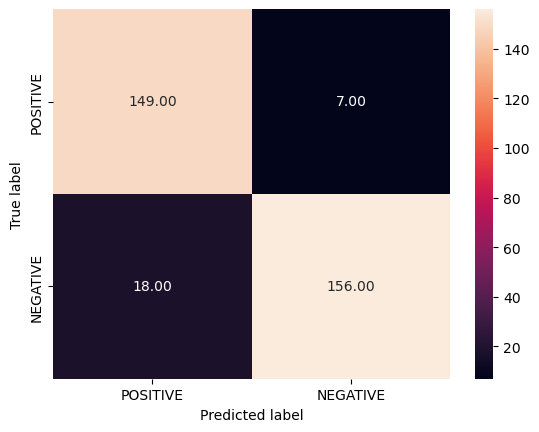

In [2443]:
draw_cm( y_pred_df.actual,
        y_pred_df.predicted_using_cost )

# Decision Tree

In [2444]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 3 )

In [2445]:
clf_tree.fit( x_train, y_train )

DecisionTreeClassifier(max_depth=3)

In [2446]:
tree_predict = clf_tree.predict( x_test )
metrics.roc_auc_score( y_test, tree_predict )

0.9626436781609196

In [2447]:
gini_node_1 = 1 - pow(491/700, 2) - pow (209/700, 2)
print( round( gini_node_1, 4) )

0.4189


In [2448]:
x_test.shape

(330, 34)

In [2449]:
clf_tree_entropy = DecisionTreeClassifier( criterion = 'entropy',
                                          max_depth = 3 )
clf_tree_entropy.fit( x_train, y_train )

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [2450]:
import math

entropy_node_1 = - (491/700) * math.log2(491/700) - (209/700) * math.log2(209/700)
print( round( entropy_node_1, 2) )

0.88


In [2451]:
tree_predict = clf_tree_entropy.predict( x_test )
metrics.roc_auc_score( y_test, tree_predict )

0.9626436781609196

In [2452]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'criterion': ['gini','entropy'],
                     'max_depth': range(2,10)}]


clf_tree = DecisionTreeClassifier()

clf = GridSearchCV(clf_tree,
                 tuned_parameters,
                 cv=10,
                 scoring='roc_auc')

clf.fit(x_train, y_train )

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [2453]:
clf.best_score_

0.9894557823129253

In [2454]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 7}

# K means


In [2455]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2456]:
# create dataset
X, y = make_blobs(
    n_samples=200,
    n_features=2,
    centers=3,
    cluster_std=0.5,
    random_state=0
)

In [2457]:
y_train

225     1
239     0
440     1
609     0
310     1
       ..
474     1
124     0
1062    1
1114    0
873     1
Name: DrinkabilityN, Length: 770, dtype: int64

In [2458]:
x_train.shape

(770, 34)

In [2459]:
X.shape

(200, 2)

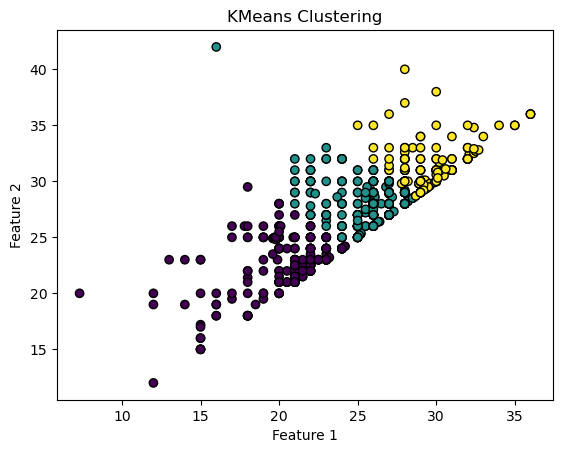

In [2460]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming x_train is a Pandas DataFrame
# If it's a NumPy array, you can convert it to a DataFrame using pd.DataFrame(x_train)
# x_train = pd.DataFrame(x_train)

# Assuming you want to use the first and second columns for clustering
data_for_clustering = x_train.iloc[:, :2]

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_for_clustering)
cluster_labels = kmeans.labels_

# Plot the clusters
plt.scatter(
    data_for_clustering.iloc[:, 0],
    data_for_clustering.iloc[:, 1],
    c=cluster_labels,
    edgecolor='black',
    cmap='viridis'
)
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


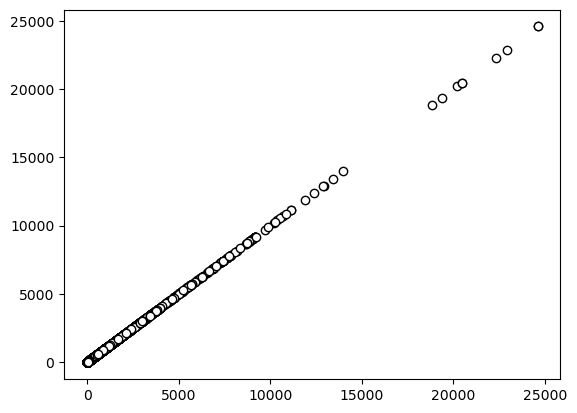

In [2461]:
# plot
plt.scatter(
   x_train, x_train,
   c='white',
   edgecolor='black'
)

In [2462]:
kmeans = KMeans(
    n_clusters=5, init='random',
    n_init=1, max_iter=4,
    tol=1e-04, random_state=2
)

In [2463]:
y_km = kmeans.fit_predict(x_train)

In [2464]:
y_km

array([0, 3, 3, 3, 1, 2, 2, 0, 2, 3, 4, 3, 3, 3, 3, 0, 0, 0, 3, 0, 3, 3,
       3, 3, 2, 3, 1, 3, 4, 3, 0, 0, 3, 0, 2, 3, 0, 3, 3, 2, 2, 4, 3, 3,
       0, 0, 2, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 2, 0, 2, 2, 3, 3, 0, 0, 3,
       3, 3, 2, 3, 0, 4, 3, 3, 0, 0, 0, 3, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0,
       0, 2, 2, 2, 3, 3, 0, 0, 0, 0, 2, 3, 3, 0, 3, 2, 3, 3, 3, 3, 0, 0,
       3, 0, 3, 3, 2, 0, 3, 3, 0, 3, 2, 0, 3, 3, 0, 3, 0, 2, 3, 0, 3, 3,
       0, 3, 1, 3, 0, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 0, 4, 2, 3, 0, 3, 2,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 3, 4, 3, 2, 3, 0, 0, 2,
       0, 2, 0, 2, 3, 3, 1, 3, 3, 4, 0, 0, 0, 0, 3, 3, 3, 0, 3, 4, 3, 3,
       3, 2, 3, 3, 2, 3, 3, 0, 2, 3, 3, 2, 2, 2, 2, 0, 1, 0, 3, 3, 2, 3,
       2, 3, 0, 2, 0, 4, 3, 3, 0, 2, 3, 0, 3, 0, 3, 2, 4, 3, 0, 2, 3, 0,
       3, 0, 0, 3, 4, 4, 3, 3, 3, 3, 4, 3, 0, 3, 3, 0, 0, 0, 0, 2, 3, 3,
       3, 3, 0, 3, 3, 0, 3, 0, 3, 2, 4, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 3,
       3, 0, 3, 2, 3, 3, 1, 0, 3, 3, 3, 0, 3, 3, 3,

In [2465]:
kmeans.predict(x_train1)

array([0, 0, 3, 4, 0, 0, 0, 3, 2, 0, 4, 0, 0, 0, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 3, 3, 0, 3, 4, 0, 3, 0, 3, 0, 0, 3, 2, 0, 0, 0, 3, 3, 0,
       3, 3, 3, 0, 0, 3, 0, 3, 0, 2, 2, 0, 0, 2, 1, 0, 3, 2, 3, 4, 3, 0,
       3, 0, 0, 0, 0, 3, 1, 3, 0, 2, 0, 0, 3, 3, 3, 3, 4, 0, 3, 0, 0, 0,
       2, 0, 3, 3, 3, 0, 3, 3, 0, 2, 2, 0, 2, 0, 3, 1, 4, 3, 0, 0, 0, 2,
       0, 3, 0, 0, 3, 0, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 2, 3, 0, 0, 3,
       3, 3, 0, 3, 3, 2, 2, 3, 2, 0, 0, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3,
       4, 3, 3, 0, 2, 1, 3, 3, 3, 0, 3, 0, 3, 1, 0, 3, 3, 0, 3, 4, 0, 3,
       3, 0, 2, 0, 0, 0, 3, 3, 2, 3, 2, 0, 3, 2, 3, 3, 3, 3, 2, 0, 2, 2,
       0, 0, 0, 0, 4, 3, 4, 0, 0, 3, 3, 3, 0, 2, 0, 0, 3, 0, 2, 0, 0, 1,
       4, 0, 3, 3, 3, 3, 0, 2, 3, 3, 3, 0, 1, 0, 3, 3, 0, 0, 3, 0, 2, 0,
       2, 4, 3, 0, 3, 2, 3, 3, 3, 0, 2, 3, 3, 3, 3, 0, 2, 3, 3, 1, 0, 3,
       3, 0, 0, 4, 3, 0, 0, 0, 3, 3, 0, 2, 3, 0, 3, 0, 4, 3, 3, 0, 3, 3,
       0, 4, 3, 0, 3, 0, 0, 0, 0, 2, 3, 0, 0, 0, 3,

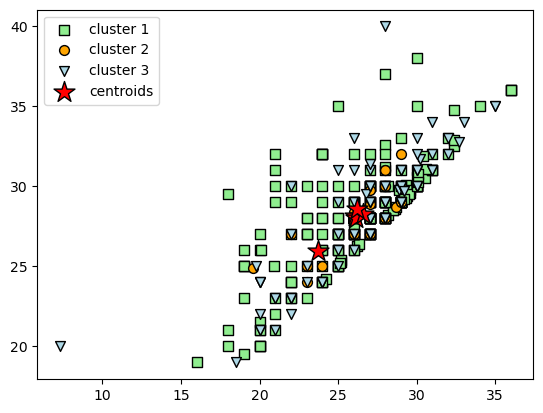

In [2466]:
# Plot the 3 clusters
plt.scatter(
    x_train.loc[y_km == 0, x_train.columns[0]], x_train.loc[y_km == 0, x_train.columns[1]],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    x_train.loc[y_km == 1, x_train.columns[0]], x_train.loc[y_km == 1, x_train.columns[1]],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    x_train.loc[y_km == 2, x_train.columns[0]], x_train.loc[y_km == 2, x_train.columns[1]],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# Plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)


In [2467]:
x_train.shape

(770, 34)

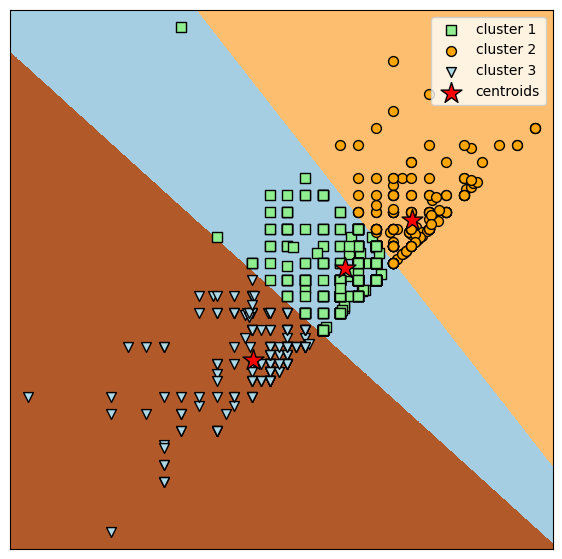

In [2468]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming x_train is a NumPy array or a Pandas DataFrame 

np.random.seed(42)

kmeans = KMeans(
    n_clusters=3, init='random',
    n_init=1, max_iter=8,
    tol=1e-04, random_state=2
)
kmeans.fit(x_train.iloc[:,0:2])

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = x_train.iloc[:, 0].min() - 1, x_train.iloc[:, 0].max() + 1
y_min, y_max = x_train.iloc[:, 1].min() - 1, x_train.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in the mesh using the original model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

# Plot the 3 clusters
plt.scatter(
    x_train.values[kmeans.labels_ == 0, 0], x_train.values[kmeans.labels_ == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    x_train.values[kmeans.labels_ == 1, 0], x_train.values[kmeans.labels_ == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    x_train.values[kmeans.labels_ == 2, 0], x_train.values[kmeans.labels_ == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# Plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
fig = plt.gcf()
fig.set_size_inches(7, 7)
plt.show()


# Neural Network

In [2469]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy,BinaryCrossentropy

In [2470]:
#model.add(Input(X.shape))
model=Sequential()
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(512,activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.02)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(256,activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.02)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(256,activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.02)))
model.add(tf.keras.layers.BatchNormalization())
#model.add(Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.01)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.02)))

model.add(Dense(1,activation='sigmoid'))

In [2474]:
model.compile(optimizer='adam',loss=BinaryCrossentropy(),metrics=['accuracy'])

In [2475]:
model.fit(x_train,y_train,epochs=200,verbose=True)

Epoch 1/200
25/25 [==============================] - 1s 3ms/step - loss: 0.3227 - accuracy: 0.9156
Epoch 2/200
25/25 [==============================] - 0s 2ms/step - loss: 0.3077 - accuracy: 0.9182
Epoch 3/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2717 - accuracy: 0.9416
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 0.3542 - accuracy: 0.9078
Epoch 5/200
25/25 [==============================] - 0s 3ms/step - loss: 0.2890 - accuracy: 0.9299
Epoch 6/200
25/25 [==============================] - 0s 3ms/step - loss: 0.3139 - accuracy: 0.9195
Epoch 7/200
25/25 [==============================] - 0s 3ms/step - loss: 0.2861 - accuracy: 0.9338
Epoch 8/200
25/25 [==============================] - 0s 3ms/step - loss: 0.2642 - accuracy: 0.9312
Epoch 9/200
25/25 [==============================] - 0s 3ms/step - loss: 0.2665 - accuracy: 0.9351
Epoch 10/200
25/25 [==============================] - 0s 3ms/step - loss: 0.2939 - accuracy: 0.9416
Epoch 11/

25/25 [==============================] - 0s 5ms/step - loss: 0.3033 - accuracy: 0.9494
Epoch 84/200
25/25 [==============================] - 0s 5ms/step - loss: 0.3403 - accuracy: 0.9325
Epoch 85/200
25/25 [==============================] - 0s 4ms/step - loss: 0.2984 - accuracy: 0.9429
Epoch 86/200
25/25 [==============================] - 0s 4ms/step - loss: 0.3153 - accuracy: 0.9182
Epoch 87/200
25/25 [==============================] - 0s 4ms/step - loss: 0.3107 - accuracy: 0.9312
Epoch 88/200
25/25 [==============================] - 0s 4ms/step - loss: 0.2977 - accuracy: 0.9364
Epoch 89/200
25/25 [==============================] - 0s 5ms/step - loss: 0.3047 - accuracy: 0.9351
Epoch 90/200
25/25 [==============================] - 0s 4ms/step - loss: 0.3239 - accuracy: 0.9286
Epoch 91/200
25/25 [==============================] - 0s 4ms/step - loss: 0.2804 - accuracy: 0.9597
Epoch 92/200
25/25 [==============================] - 0s 4ms/step - loss: 0.3561 - accuracy: 0.9208
Epoch 93/200


25/25 [==============================] - 0s 4ms/step - loss: 0.2519 - accuracy: 0.9481
Epoch 165/200
25/25 [==============================] - 0s 4ms/step - loss: 0.2664 - accuracy: 0.9351
Epoch 166/200
25/25 [==============================] - 0s 3ms/step - loss: 0.2266 - accuracy: 0.9390
Epoch 167/200
25/25 [==============================] - 0s 3ms/step - loss: 0.2414 - accuracy: 0.9481
Epoch 168/200
25/25 [==============================] - 0s 4ms/step - loss: 0.2177 - accuracy: 0.9571
Epoch 169/200
25/25 [==============================] - 0s 3ms/step - loss: 0.3175 - accuracy: 0.9182
Epoch 170/200
25/25 [==============================] - 0s 4ms/step - loss: 0.2534 - accuracy: 0.9403
Epoch 171/200
25/25 [==============================] - 0s 4ms/step - loss: 0.2476 - accuracy: 0.9429
Epoch 172/200
25/25 [==============================] - 0s 4ms/step - loss: 0.2633 - accuracy: 0.9312
Epoch 173/200
25/25 [==============================] - 0s 5ms/step - loss: 0.2840 - accuracy: 0.9286
Epoc

In [2476]:
model.evaluate(x_train,y_train)
model.evaluate(x_test1,y_test1)

11/11 [==============================] - 0s 1ms/step - loss: 0.2362 - accuracy: 0.9613


[0.2362457662820816, 0.961309552192688]